In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("/Users/stevenlu/Desktop/samples.csv")

In [3]:
df.head()

,GEMS Station Number;Sample Date;Sample Time;Depth;Parameter Code;Analysis Method Code;Value Flags;Value;Unit;Data Quality
0,IND00001;1991-04-04;12:00;0.6;H-T;T-COL-EDTA-E...
1,IND00001;1991-04-04;12:00;0.6;TP;COL-SnCl-SA-P...
2,IND00001;1991-05-07;12:00;0.6;TKN;TKN-T-COL;;3...
3,IND00001;1991-05-07;12:00;0.6;NH3N;COL-NES;;1....
4,IND00001;1991-05-07;12:00;0.6;O2-Dis;T-COL-I-A...


In [4]:
df1 = df['GEMS Station Number;Sample Date;Sample Time;Depth;Parameter Code;Analysis Method Code;Value Flags;Value;Unit;Data Quality'].str.split(';', expand = True)
string = 'GEMS Station Number;Sample Date;Sample Time;Depth;Parameter Code;Analysis Method Code;Value Flags;Value;Unit;Data Quality'      
string1 = string.split(";")

In [5]:
df1.columns = [string1]
len(df1['Value Flags'].count()) > 0

True

In [6]:
#Final Dataframe
df1.head()

,GEMS Station Number,Sample Date,Sample Time,Depth,Parameter Code,Analysis Method Code,Value Flags,Value,Unit,Data Quality
0,IND00001,1991-04-04,12:00,0.6,H-T,T-COL-EDTA-EBT,,116.0,mg/l,Fair
1,IND00001,1991-04-04,12:00,0.6,TP,COL-SnCl-SA-PPS,,0.0,mg/l,Poor
2,IND00001,1991-05-07,12:00,0.6,TKN,TKN-T-COL,,3.36,mg/l,Fair
3,IND00001,1991-05-07,12:00,0.6,NH3N,COL-NES,,1.12,mg/l,Fair
4,IND00001,1991-05-07,12:00,0.6,O2-Dis,T-COL-I-AZD,,8.2,mg/l,Fair


In [7]:
exportdata = pd.read_csv("/Users/stevenlu/Desktop/Indian_textile_exports.csv")
exportdata.head()


,Year,Export(US$Thousand)
0,1988,"3,148,861.47"
1,1989,"4,080,891.82"
2,1990,"4,899,971.21"
3,1991,"4,882,667.33"
4,1992,"5,707,423.89"


In [8]:
remove_comma = lambda x: x.replace(',','')
exportdata['Export(US$Thousand)'] = exportdata['Export(US$Thousand)'].apply(remove_comma)
exportdata['Export(US$Thousand)'] = exportdata['Export(US$Thousand)'].astype(float)

In [9]:
exportdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Year                   31 non-null int64
Export(US$Thousand)    31 non-null float64
dtypes: float64(1), int64(1)
memory usage: 576.0 bytes


In [10]:
year_to_dt = lambda d: datetime.datetime.strptime(d,'%Y')
exportdata['Year'] = exportdata['Year'].astype(str)
exportdata['Year'] = exportdata['Year'].apply(year_to_dt)
exportdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Year                   31 non-null datetime64[ns]
Export(US$Thousand)    31 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 576.0 bytes


In [14]:
exportdata.set_index('Year',inplace=True)

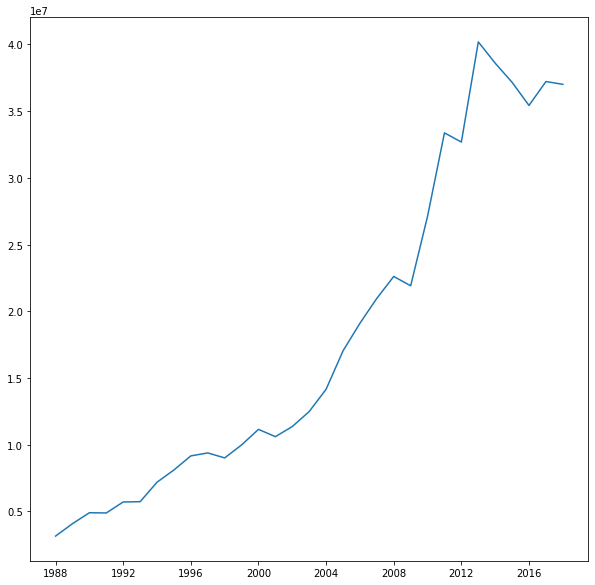

In [15]:
plt.figure(figsize=(10,10))
plt.plot(exportdata)

In [16]:
exportdata.head()

,Export(US$Thousand)
Year,
1988-01-01,3148861.47
1989-01-01,4080891.82
1990-01-01,4899971.21
1991-01-01,4882667.33
1992-01-01,5707423.89
